In [5]:
%pip install scikit-learn
%pip install pandas
%pip install -U matplotlib
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 25.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.4
    Uninstalling matplotlib-3.8.4:
      Successfully uninstalled matplotlib-3.8.4
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.1 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import joblib
import os 
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Load the dataset
file_path = 'enriched_playlist_v2.csv'
data = pd.read_csv(file_path)
data = data[data['num_followers'] !=53519]

In [8]:
# Find the unique playlist_ids of the top 1000 playlists with the most followers
top_1000_playlist_ids = data.drop_duplicates(subset='playlist_id').nlargest(1000, 'num_followers')['playlist_id']

# Create a subset of the main dataset with only the top 1000 playlists
subset_data = data[data['playlist_id'].isin(top_1000_playlist_ids)]

# Save the subset data to a new CSV file
#subset_file_path = 'subset_top_1000_playlists.csv'
#subset_data.to_csv(subset_file_path, index=False)

# Display the top 5 records as a sample output
print(subset_data.head())

    playlist_id  num_followers                track_id         track_name  \
42          224              3  6hfZpvMQ2eu2pFJLE7KVLd  Boğaziçi Rüyaları   
43          224              3  1uUyPBaiAtHsTDtY2vvGMS         Yeni Hayat   
44          224              3  1fAMA1PWg0nnYLQQYcSSls      Speck Of Gold   
45          224              3  1NBRZFIFUyeUO6cVMjBHM1  Miracle Feat:Neve   
46          224              3  6cWlmDC8vU2WOMEID6ZL5K     Cry Me A River   

    artist_name  danceability  energy  key  loudness  mode  speechiness  \
42   Can Atilla         0.284   0.643    5    -6.376     1       0.0423   
43   Can Atilla         0.549   0.694    9    -7.364     0       0.0356   
44    Afterlife         0.667   0.656    4    -8.001     0       0.0894   
45    Afterlife         0.556   0.483    0    -7.948     0       0.0334   
46  Diana Krall         0.299   0.156    4   -13.794     0       0.0321   

    acousticness  instrumentalness  liveness  valence    tempo  duration_ms  
42      

In [9]:
subset_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95493 entries, 42 to 1019148
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   playlist_id       95493 non-null  int64  
 1   num_followers     95493 non-null  int64  
 2   track_id          95493 non-null  object 
 3   track_name        95493 non-null  object 
 4   artist_name       95493 non-null  object 
 5   danceability      95493 non-null  float64
 6   energy            95493 non-null  float64
 7   key               95493 non-null  int64  
 8   loudness          95493 non-null  float64
 9   mode              95493 non-null  int64  
 10  speechiness       95493 non-null  float64
 11  acousticness      95493 non-null  float64
 12  instrumentalness  95493 non-null  float64
 13  liveness          95493 non-null  float64
 14  valence           95493 non-null  float64
 15  tempo             95493 non-null  float64
 16  duration_ms       95493 non-null  int64  


In [10]:
# Separate features for normalization and standardization
features_to_normalize = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
features_to_standardize = ['loudness', 'tempo']

# Prepare features and labels
X = subset_data[['danceability', 'energy', 'loudness', 'speechiness',
          'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = subset_data['num_followers']

# Apply MinMaxScaler for normalization
scaler_norm = MinMaxScaler()
X.loc[:, features_to_normalize] = scaler_norm.fit_transform(X[features_to_normalize])

# Apply StandardScaler for standardization
scaler_std = StandardScaler()
X.loc[:, features_to_standardize] = scaler_std.fit_transform(X[features_to_standardize])

/tmp/ipykernel_1753/3286052520.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, features_to_normalize] = scaler_norm.fit_transform(X[features_to_normalize])
/tmp/ipykernel_1753/3286052520.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, features_to_standardize] = scaler_std.fit_transform(X[features_to_standardize])


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Print model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 10489.14463624272
R^2 Score: 0.0012672051267512696
                  Coefficient
danceability        -1.814131
energy              -2.785262
loudness             0.786518
speechiness        -26.889807
acousticness         1.596328
instrumentalness   -11.002198
liveness            -3.437698
valence             -3.130909
tempo               -0.125942


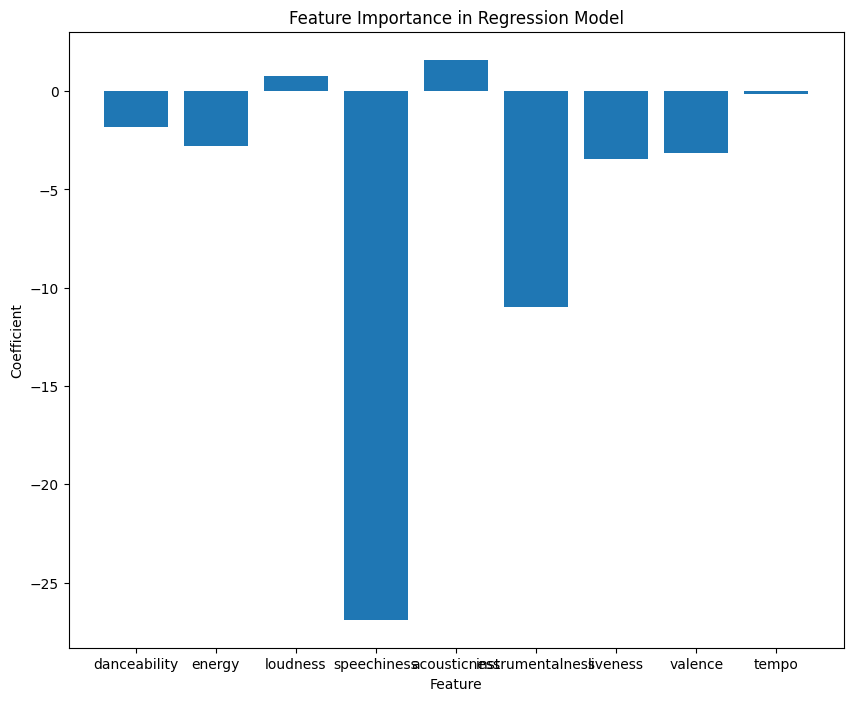

In [12]:
# Plot the coefficients to show feature importance
plt.figure(figsize=(10, 8))
plt.bar(coefficients.index, coefficients['Coefficient'])
plt.title('Feature Importance in Regression Model')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()